### Exploratory Data Analysis
###Data Pre-Processing

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df_matches = pd.read_csv("matches.csv")
df_matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [2]:
df_deliveries = pd.read_csv("deliveries.csv")
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [3]:
print(df_matches.shape)
print(df_deliveries.shape)

(756, 18)
(179078, 21)


In matches data frame columns like umpire1,umpire2,umpire3 are not useful because these days they are using technology. So we cant decide which umpire is more useful for predicting anything related to match.

Date is also not useful because we already have season column which is also almost equal to date.

City and venue also not important features for this year IPL. Because IPL2020 is happening in UAE, only 2014 ipl was happened in UAE that to half season. But i am removing only venue it almost equal to city feature.

'Result' feature is almost equal to 'winner' feature. So i am dropping result column also.

In [4]:
df_matches = df_matches.drop(['venue','date','result','umpire1','umpire2','umpire3'], axis = 1) 
df_matches.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,Rising Pune Supergiant,0,7,SPD Smith


In [5]:
print(df_matches["team1"].value_counts())

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64


In [6]:
#In 2019 delhi daredevils name changed to delhi capitals. So i am replacing old name with new name for all the rows.
df_matches = df_matches.replace(to_replace ="Delhi Daredevils", value = "Delhi Capitals") 

df_deliveries = df_deliveries.replace(to_replace = "Delhi Daredevils", value = "Delhi Capitals")

#Rising pune supergiants name also printed in two ways. Lets change it to Rising pune supergiants.
df_matches = df_matches.replace(to_replace ="Rising Pune Supergiant", value = "Rising Pune Supergiants") 

df_deliveries = df_deliveries.replace(to_replace = "Rising Pune Supergiant", value = "Rising Pune Supergiants")

In [7]:
#checking null values in matches dataset
print(df_matches.isnull().sum())

id                 0
season             0
city               7
team1              0
team2              0
toss_winner        0
toss_decision      0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
dtype: int64


In [8]:
#printing null rows in matches dataset
df1_null = df_matches[df_matches.isna().any(axis=1)]
df1_null.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
300,301,2011,Delhi,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,0,NaN,0,0,NaN
461,462,2014,NaN,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Royal Challengers Bangalore,0,7,PA Patel


In [9]:
#After seeing above table we can clearly understood that 4 matches are not played beacuse of rain, badlight or pitch condition. 
#So i am replacing those null values in winner column with no result and palyer of the match column null values with not declared.
df_matches["winner"].fillna("No result", inplace = True)
df_matches['player_of_match'].fillna("Not declared", inplace = True)
#city column also has 7 null values. I checked those matches data in Espn website and they played in Dubai.
df_matches["city"].fillna("Dubai", inplace = True)
print(df_matches.shape)

(756, 12)


In [10]:
#checking null values in deliveries dataset
print(df_deliveries.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64


Player_dismissed, dismissal_kind and fielder features are having null values. But if you consider today questions only 'player_dismissed' and 'dismissal_kind' features are useful for today analysis. So i am removing "fielder" feature.

Filling player_dismissed null values with 'No wicket', didmissal_Kind null values with also No Wicket

In [11]:
#dropping fielder column
df_deliveries = df_deliveries.drop(['fielder'], axis = 1) 
#filling null values
df_deliveries["player_dismissed"].fillna("No Wicket", inplace = True)
df_deliveries["dismissal_kind"].fillna("No Wicket", inplace = True)
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket


In [12]:
# list of dtypes to include 
include =['float', 'int']
desc = df_deliveries.describe(include = include)
desc

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


I think there are no outliers present in overs column but in balls column balls range is between(0-9), it happens if bowlers balls extra deliveries.

In innings column maximum value is 5 so there are some outliers presented. Because there are 2 innings per match, if match tied then they will conduct one super over till last season. So maximum number of innings is 4.

And in remaining columns max value is in certain limit only. So i can say there are not much outliers.

### Q1) Who will win today match DC vs SRH?

In [14]:
#First Lets see head-head results
df_SRH_DC = df_matches[((df_matches['team1'] == 'Delhi Capitals') | (df_matches['team1'] == 'Sunrisers Hyderabad')) & 
                        ((df_matches['team2'] == 'Delhi Capitals') | (df_matches['team2'] == 'Sunrisers Hyderabad'))] 

#plotting SRH and DC wins against each other
import plotly.graph_objs as go
df_winner = df_SRH_DC[['id','winner']].groupby('winner').size().reset_index()
df_winner.columns = ['winner','total_wins']
df_winner = df_winner.sort_values('total_wins',ascending=False)[:2]

data = go.Bar(x = df_winner['winner'],y = df_winner['total_wins'])
layout = go.Layout(title = 'Number of wins by DC and SRH against each other',xaxis = dict(title = 'Team'),yaxis = dict(title = 'No of wins'))
fig = go.Figure(data = data,layout = layout)
fig.show()

**Conclusion :-**

SRH and DC played 15 matches out of 15 SRH won 9 matches and DC won 6 matches. So i am predicting SRH will win today match.

### Q2) How many balls more/less will DC take to score 20 runs from after they reach a team total of of as compare to SRH?

In [15]:
#First i am taking SRH vs DC matches.
#Than calculating Number of balls take to reach 20 runs after they reach 30 runs in each match by both teams.
#Now i am filtering SRH batting against DC.
df_SRHbatting = df_deliveries[(df_deliveries['batting_team'] == 'Sunrisers Hyderabad') & (df_deliveries['bowling_team'] == 'Delhi Capitals')]
                          
#converting total_runs,match id, wide_runs and no-balls into list
total_runs_list = df_SRHbatting['total_runs'].tolist()
match_id_list = df_SRHbatting['match_id'].tolist()
wideballs_list = df_SRHbatting['wide_runs'].tolist()
noballs_list = df_SRHbatting['noball_runs'].tolist()

listoflists = []
listoflists.append(match_id_list)
listoflists.append(total_runs_list)
listoflists.append(wideballs_list)
listoflists.append(noballs_list)

SRH_ballsfaced = []
SRH_matchID = []
run = 0
balls_faced = 0
for i in range(len(listoflists[0])-1):
     run = run + (listoflists[1][i])
     if run >= 30:
        run = 0
     if listoflists[2][i] == 0 and listoflists[3][i] == 0 : #only including valid deliveries in balls_faced not wides, no-balls
        balls_faced = balls_faced + 1
     if listoflists[0][i] != listoflists[0][i+1] and listoflists[0][i] not in SRH_matchID and run<20:
        SRH_ballsfaced.append('NA')  #here 'NA' means SRH scored less than 50 runs(30 + 20) in a match.
        SRH_matchID.append(listoflists[0][i])
        balls_faced = 0
        run = 0
     if listoflists[0][i] != listoflists[0][i+1]:
        balls_faced = 0
        run = 0 
     if listoflists[0][i] not in SRH_matchID:   
        if run >= 20:
           SRH_ballsfaced.append(balls_faced)
           SRH_matchID.append(listoflists[0][i])
           run = 0
           balls_faced = 0

print("Balls faced to reach 20 runs after scoring 30 runs by SRH:",SRH_ballsfaced,'\n')
print("Corresponding Match_Id             :",SRH_matchID)

Balls faced to reach 20 runs after scoring 30 runs by SRH: [20, 16, 28, 17, 14, 15, 23, 15, 22, 19, 17, 18, 16, 16, 17] 

Corresponding Match_Id             : [21, 39, 394, 428, 469, 489, 531, 561, 618, 628, 7929, 7935, 11152, 11321, 11413]


In [16]:
#Now filtering DC against SRH bowling
df_DCbatting = df_deliveries[(df_deliveries['batting_team'] == 'Delhi Capitals') & (df_deliveries['bowling_team'] == 'Sunrisers Hyderabad')]
                          
#converting total_runs,match id, wide_runs and no-balls into list
total_runs_list = df_DCbatting['total_runs'].tolist()
match_id_list = df_DCbatting['match_id'].tolist()
wideballs_list = df_DCbatting['wide_runs'].tolist()
noballs_list = df_DCbatting['noball_runs'].tolist()

listoflists = []
listoflists.append(match_id_list)
listoflists.append(total_runs_list)
listoflists.append(wideballs_list)
listoflists.append(noballs_list)

DC_ballsfaced = []
DC_matchID = []
run = 0
balls_faced = 0
for i in range(len(listoflists[0])-1):
     run = run + (listoflists[1][i])
     if run >= 30:
        run = 0
     if listoflists[2][i] == 0 and listoflists[3][i] == 0 : #only including valid deliveries in balls_faced not wides, no-balls
        balls_faced = balls_faced + 1
     if listoflists[0][i] != listoflists[0][i+1] and listoflists[0][i] not in DC_matchID and run<20:
        DC_ballsfaced.append('NA')  #here 'NA' means SRH scored less than 50 runs(30 + 20) in a match.
        DC_matchID.append(listoflists[0][i])
        balls_faced = 0
        run = 0
     if listoflists[0][i] != listoflists[0][i+1]:
        balls_faced = 0
        run = 0 
     if listoflists[0][i] not in DC_matchID:   
        if run >= 20:
           DC_ballsfaced.append(balls_faced)
           DC_matchID.append(listoflists[0][i])
           run = 0
           balls_faced = 0

print("Balls faced to reach 20 runs after scoring 30 runs by DC:",DC_ballsfaced,'\n')
print("Corresponding Match_Id             :",DC_matchID)

Balls faced to reach 20 runs after scoring 30 runs by DC: [15, 15, 19, 24, 17, 20, 18, 23, 18, 23, 13, 21, 24, 17, 15] 

Corresponding Match_Id             : [21, 39, 394, 428, 469, 489, 531, 561, 618, 628, 7929, 7935, 11152, 11321, 11413]


In [18]:
#converting above lists into dataframes 
df_SRH_ballsfaced =  pd.DataFrame(list(zip(SRH_matchID, SRH_ballsfaced)), columns =['match_id', 'balls_faced_SRH']) 
df_DC_ballsfaced =  pd.DataFrame(list(zip(DC_matchID, DC_ballsfaced)), columns =['match_id', 'balls_faced_DC']) 

#Merging SRH and DC ballsfaced dataframes on match_id
df_SRHvsDC = pd.merge(df_SRH_ballsfaced, df_DC_ballsfaced, left_on='match_id',right_on='match_id', how='outer')

#Now subtracting both teams balls faced list
df_SRHvsDC['difference_in_balls'] = abs(df_SRHvsDC['balls_faced_SRH'] - df_SRHvsDC['balls_faced_DC'])
df_SRHvsDC.head(3)

,match_id,balls_faced_SRH,balls_faced_DC,difference_in_balls
0,21,20,15,5
1,39,16,15,1
2,394,28,19,9


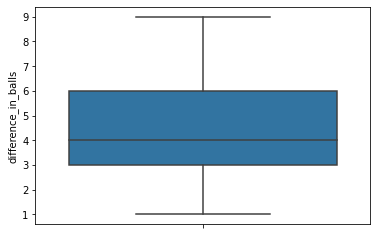

In [21]:
import seaborn as sns
ax = sns.boxplot(y="difference_in_balls", data=df_SRHvsDC)

**Conclusion :-**



*   In 75% of the matches the difference between balls is less than 6 and maximum difference in balls in 9.
*   So in today match i am predicting the difference between balls to reach 20 runs after scoring 30 runs is (0-6)



### Q3) How many runs will David Warner score in his last 7balls?

In [39]:
df_warner = df_deliveries[(df_deliveries['batsman'] == 'DA Warner')]

#converting total_runs,match id, wide_runs and no-balls into list
batsman_runs_list = df_warner['batsman_runs'].tolist()
match_id_list = df_warner['match_id'].tolist()
wideballs_list = df_warner['wide_runs'].tolist()

listoflists = []
listoflists.append(match_id_list)
listoflists.append(batsman_runs_list)
listoflists.append(wideballs_list)

#reversing list of lists because we want last 7 balls of wraner in each match he played
reversed_list = [elem[::-1] for elem in listoflists]

Warner_runs_scored = []
Warner_matchID = []
runs_scored = 0
balls_faced = 0
for i in range(len(reversed_list[0])-1):
  if reversed_list[0][i] not in Warner_matchID:
     runs_scored = runs_scored + (reversed_list[1][i])
     if reversed_list[2][i] == 0:  #here i am not including wide balls in batsman faced delivereies
        balls_faced = balls_faced + 1
        if balls_faced == 7 :
           Warner_runs_scored.append(runs_scored)
           Warner_matchID.append(reversed_list[0][i])
           balls_faced = 0
           runs_scored = 0
  if reversed_list[0][i] != reversed_list[0][i+1] and reversed_list[0][i] not in Warner_matchID:
        Warner_runs_scored.append(0)  #appending 0 if warner not faced 7 balls in a match.
        Warner_matchID.append(listoflists[0][i])
        balls_faced = 0
        runs_scored = 0        

print("Number of runs scored by david warner in his last 7 balls :",Warner_runs_scored,'\n')
print("Corresponding Match_Id             :",Warner_matchID)


Number of runs scored by david warner in his last 7 balls : [9, 7, 8, 14, 17, 6, 9, 7, 4, 13, 10, 10, 7, 18, 5, 7, 8, 8, 6, 4, 10, 3, 23, 0, 8, 10, 21, 11, 19, 0, 10, 12, 8, 13, 0, 5, 9, 9, 12, 18, 8, 10, 13, 0, 13, 11, 11, 23, 24, 10, 6, 15, 9, 0, 15, 7, 6, 0, 8, 6, 0, 3, 4, 16, 0, 0, 0, 10, 0, 22, 11, 5, 3, 0, 7, 14, 8, 6, 19, 10, 4, 0, 7, 3, 0, 6, 12, 9, 6, 0, 0, 0, 16, 2, 0, 17, 4, 11, 16, 5, 6, 0, 13, 0, 9, 4, 6, 10, 7, 10, 0, 7, 13, 16, 11, 14, 4, 16, 4, 20, 12, 14] 

Corresponding Match_Id             : [11339, 11336, 11332, 11329, 11324, 11321, 11313, 11310, 11152, 11147, 11144, 11138, 636, 635, 634, 631, 628, 622, 618, 616, 613, 610, 603, 253, 594, 591, 588, 584, 580, 331, 568, 564, 561, 558, 374, 551, 544, 541, 537, 531, 529, 525, 521, 424, 507, 503, 500, 496, 493, 489, 487, 481, 477, 481, 469, 466, 461, 496, 446, 443, 507, 433, 428, 419, 525, 525, 529, 401, 531, 390, 385, 382, 380, 551, 372, 369, 364, 357, 301, 293, 289, 588, 274, 269, 588, 263, 259, 250, 241, 613, 613, 613,

In [40]:
#converting above lists into dataframes 
df_warner_runs_scored =  pd.DataFrame(list(zip(Warner_matchID, Warner_runs_scored)), columns =['match_id', 'runs_scored_warner']) 
df_warner_runs_scored.head()

,match_id,runs_scored_warner
0,11339,9
1,11336,7
2,11332,8
3,11329,14
4,11324,17


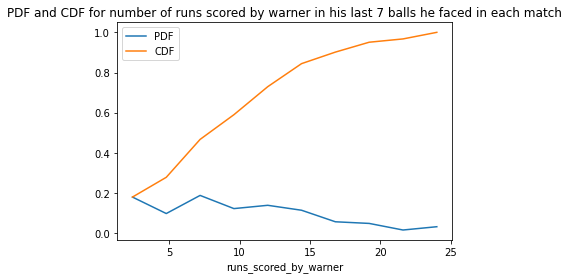

count    122.000000
mean       8.401639
std        6.011916
min        0.000000
25%        4.000000
50%        8.000000
75%       12.000000
max       24.000000
Name: runs_scored_warner, dtype: float64

In [42]:
#Now plotting CDF and PDF
import numpy as np
leg = ["PDF", "CDF"]
counts, bin_edges = np.histogram(df_warner_runs_scored['runs_scored_warner'], bins=10,density = True)
pdf = counts/(np.sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.legend(leg)
plt.xlabel('runs_scored_by_warner')
plt.title("PDF and CDF for number of runs scored by warner in his last 7 balls he faced in each match")
plt.show();
df_warner_runs_scored['runs_scored_warner'].describe()

According to above observation Probability very high between 5-10 and median is 8. 

So i am predicting he will score 8 runs in last 7 balls he faced.

### Q4) Which batsman will score most boundaries in the match?

In [27]:
df_batsman = df_deliveries[(df_deliveries['batsman'] == 'DA Warner') | (df_deliveries['batsman'] == 'MK Pandey') |
                              (df_deliveries['batsman'] == 'WP Saha') | (df_deliveries['batsman'] == 'KS Williamson') |
                              (df_deliveries['batsman'] == 'S Dhawan') | (df_deliveries['batsman'] == 'SS Iyer') |
                              (df_deliveries['batsman'] == 'RR Pant') | (df_deliveries['batsman'] == 'MP Stoinis')]
#Calculating number of boundaries above batsman scored in IPL
df_boundaries = df_batsman[(df_batsman['batsman_runs'] == 4) | (df_batsman['batsman_runs'] == 6)]
df_boundaries = df_boundaries.groupby('batsman',as_index = False)['batsman_runs'].count()
df_boundaries.rename(columns={'batsman_runs':'number_of_boundaries'}, inplace=True)

#Calculating number of matches above batsman Played in IPL
df_matches_played = df_batsman.groupby('batsman',as_index = False)['match_id'].nunique()
df_matches_played.rename(columns={'match_id':'matches_played'},inplace=True)

#Now merging above two dataframes
df_boundaries = pd.merge(df_matches_played, df_boundaries, left_on='batsman',right_on='batsman', how='outer')
df_boundaries.head(8)

,batsman,matches_played,number_of_boundaries
0,DA Warner,126,640
1,KS Williamson,41,155
2,MK Pandey,119,329
3,MP Stoinis,25,52
4,RR Pant,54,248
5,S Dhawan,158,622
6,SS Iyer,61,217
7,WP Saha,93,220


In [32]:
#Now taking average 
df_boundaries['boundaries_per_match'] = round(df_boundaries['number_of_boundaries']/df_boundaries['matches_played'],0)
df_boundaries.head(8)

,batsman,matches_played,number_of_boundaries,boundaries_per_match
0,DA Warner,126,640,5.0
1,KS Williamson,41,155,4.0
2,MK Pandey,119,329,3.0
3,MP Stoinis,25,52,2.0
4,RR Pant,54,248,5.0
5,S Dhawan,158,622,4.0
6,SS Iyer,61,217,4.0
7,WP Saha,93,220,2.0


**Conclusion :-**



*   David Warner and Rishab pant has highest boundaries per match
*   Both of them are in same option also, So i am predicting Warner or Rishab will hit more boundaries in the match.



### Q5) How many wickets will Rashid Khan take in the match?

In [36]:
#Filtering rashid khan wickets. Run outs not counted in bowler wickets.
df_rashid = df_deliveries[(df_deliveries['bowler'] == 'Rashid Khan') & (df_deliveries['player_dismissed'] != 'No Wicket') &
                          (df_deliveries['dismissal_kind'] != 'run out')]

df_wickets = df_rashid.groupby('match_id',as_index=False)['player_dismissed'].count()
df_wickets.rename(columns={'player_dismissed':'number_of_wickets'},inplace=True)
df_wickets.head()

,match_id,number_of_wickets
0,1,2
1,6,3
2,10,1
3,14,1
4,19,2


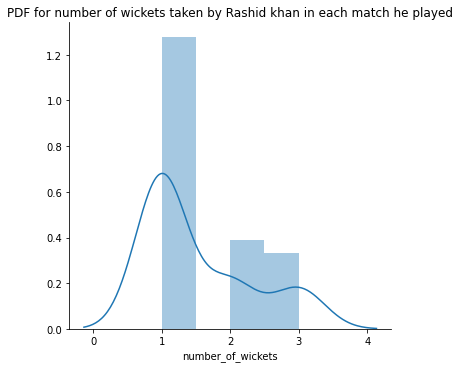

count    36.000000
mean      1.527778
std       0.774084
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: number_of_wickets, dtype: float64

In [37]:
import matplotlib.pyplot as plt
sns.FacetGrid(df_wickets,size=5) \
   .map(sns.distplot, "number_of_wickets") \
   .add_legend();

plt.title("PDF for number of wickets taken by Rashid khan in each match he played")
plt.show();
df_wickets['number_of_wickets'].describe()

**Conclusion :-**



*   Probability is very high for wickets = 1 and 75% matches he took less than 2 wickets per match.
*   I am predicting in today match he will took 1 wicket.

